<h1 style =" text-align : center">Project name : Airbnb data analysis by EDA Pandas</h1> 
<p style =" text-align : center"><strong>By</strong> : Rana Adel</p>

<h3 style= color:black>Problem definition:</h3>
<P>Given Airbnb's recent introduction of a pricing optimization service to assist property listers in setting prices, the goal is to conduct a comprehensive exploration of the provided data. This exploration specifically focuses on understanding the distribution of listing prices within the data. This will be conducted through the steps of data preprocessing(Section A)and answering the proposed questions for figuring out the correlation between the price and the other factors in the given data set(section B).</p>

<h3>Section A: Preprosessing the provided data</h3>
<h4>First:</h4> 
<ol><li> Importing the liberaries.
<li> Reading the data defining the delimiter
</ol>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     
import seaborn as sns  

In [2]:
listings = pd.read_csv('Rana-_Adel_Data-Science-EDA_airbnb/airbnb_nyc.csv', delimiter=',')

In [3]:
listings.shape

(30179, 81)

In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 81 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30179 non-null  int64  
 1   name                                          30166 non-null  object 
 2   summary                                       28961 non-null  object 
 3   description                                   29575 non-null  object 
 4   experiences_offered                           30179 non-null  object 
 5   neighborhood_overview                         18113 non-null  object 
 6   transit                                       18190 non-null  object 
 7   house_rules                                   16623 non-null  object 
 8   host_id                                       30179 non-null  int64  
 9   host_since                                    30170 non-null 

<ul> <li>We havd a datafram that includes 30179 rows and 81 columns.
<li>Data includes both numerical and categorical data that will help to give insights for the data.</ul>

In [5]:
listings.head(2)

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,...,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


<h4>Second:</h4>

Preprocessing the data that icludindes:
  <ol>
   <li> Duplicates
  
   <li> Missing values :
   
       - Checking NaN values
       - Dropping NaN values 
       
   

In [6]:
listings = listings.drop_duplicates()
listings.shape

(30179, 81)

So, there is no duplicat rows. Then I will check the Nan values and replarce them.

In [7]:
listings.isnull()

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30174,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30175,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30176,False,False,True,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30177,False,False,True,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
listings.isnull().sum().sort_values(ascending=False)

house_rules              13556
host_response_time       13097
host_response_rate       13097
neighborhood_overview    12066
transit                  11989
                         ...  
number_of_reviews            0
number_of_reviews_ltm        0
instant_bookable             0
cancellation_policy          0
event_suitable               0
Length: 81, dtype: int64

I will create a list that include only the columns that have a nan values. 

In [9]:
columns_with_nan =[]
for column in listings.columns:  
    if listings[column].isnull().any():
        columns_with_nan.append(column)

columns_with_nan

['name',
 'summary',
 'description',
 'neighborhood_overview',
 'transit',
 'house_rules',
 'host_since',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_identity_verified',
 'neighbourhood',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [10]:
listings[columns_with_nan]

,name,summary,description,neighborhood_overview,transit,house_rules,host_since,host_response_time,host_response_rate,host_is_superhost,...,host_identity_verified,neighbourhood,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,39698.0,within an hour,1.00,0.0,...,1.0,Brooklyn,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.21
1,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,NaN,NaN,Upon arrival please have a legibile copy of yo...,39777.0,within a day,1.00,0.0,...,1.0,Harlem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,NaN,NaN,NaN,39953.0,within a day,1.00,0.0,...,1.0,Harlem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,40006.0,within an hour,1.00,1.0,...,0.0,Brooklyn,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.37
4,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,NaN,Metro 1 et A,NaN,40014.0,NaN,NaN,0.0,...,1.0,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30174,QUIT PRIVATE HOUSE,THE PUBLIC TRANSPORTATION: THE TRAIN STATION I...,THE PUBLIC TRANSPORTATION: THE TRAIN STATION I...,QUIT QUIT QUIT !!!!!!,TRAIN STATION 5 MINUTE UBER OR 15 MINUTE WALK ...,"Guest should not wear shoes, no smoking mariju...",42722.0,within an hour,0.86,0.0,...,0.0,Jamaica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30175,Charming one bedroom - newly renovated rowhouse,"This one bedroom in a large, newly renovated r...","This one bedroom in a large, newly renovated r...","There's an endless number of new restaurants, ...",We are three blocks from the G subway and abou...,NaN,41504.0,within a day,0.63,0.0,...,1.0,Bedford-Stuyvesant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30176,Affordable room in Bushwick/East Williamsburg,NaN,NaN,NaN,NaN,NaN,41419.0,a few days or more,0.40,0.0,...,0.0,Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30177,43rd St. Time Square-cozy single bed,NaN,NaN,NaN,NaN,NaN,42104.0,within an hour,1.00,0.0,...,1.0,Hell's Kitchen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
listings[columns_with_nan].shape

(30179, 21)

So we have 21 coloumns that include Nan values some of them numerical and some of them categorical.

In [12]:
listings[columns_with_nan].isnull().sum().sort_values(ascending=False)

house_rules                    13556
host_response_time             13097
host_response_rate             13097
neighborhood_overview          12066
transit                        11989
review_scores_location          9132
review_scores_value             9130
review_scores_checkin           9129
review_scores_accuracy          9111
review_scores_communication     9110
review_scores_cleanliness       9101
review_scores_rating            9085
reviews_per_month               8260
summary                         1218
description                      604
name                              13
neighbourhood                      9
host_identity_verified             9
host_is_superhost                  9
host_since                         9
host_listings_count                9
dtype: int64

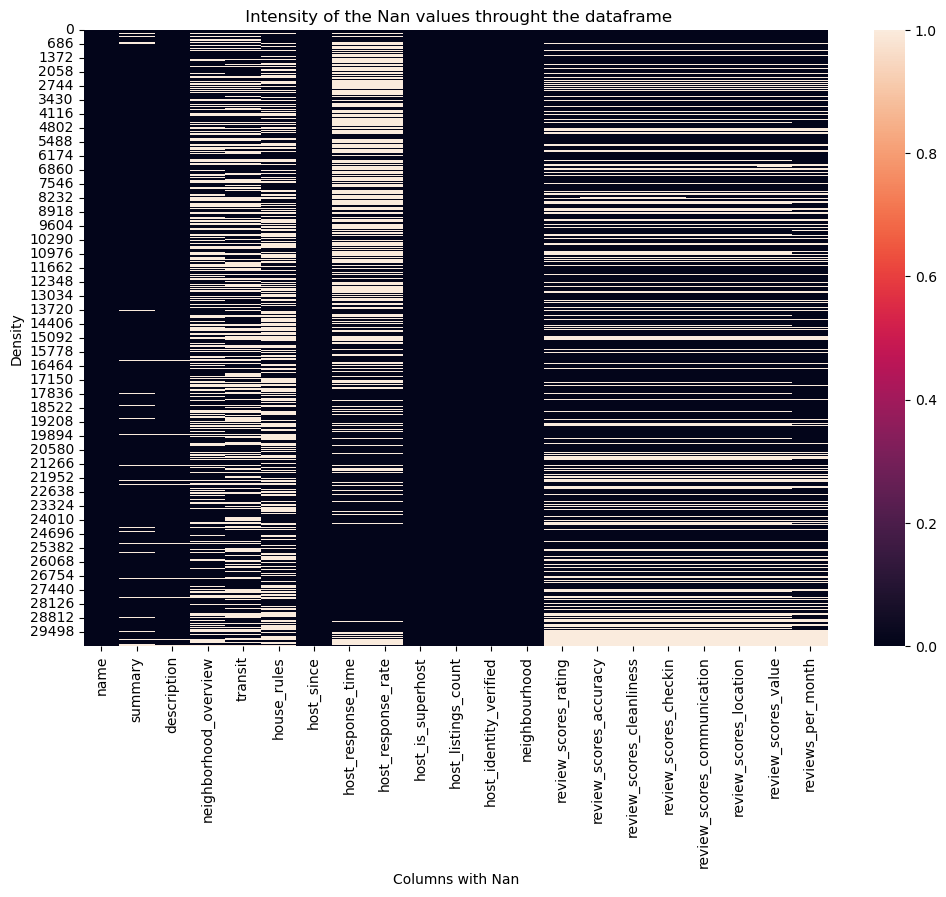

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(listings[columns_with_nan].isnull())
plt.title(' Intensity of the Nan values throught the dataframe')
plt.xlabel('Columns with Nan')
plt.ylabel('Density')
plt.show()


<h4>Conclusion</h4>

The figure one shows the intensity distribution using heatmap of the nan values through the data provided. Both name and Summary have the least density of the Nan values however their information is already included in the description colume so either i will drop these two columns or i will replace the nan values. Since the intensity is not high i will replace these nan values.

In [14]:
listings[["house_rules","host_response_time","neighborhood_overview","transit","summary","description","name","neighbourhood"]]=listings[["house_rules","host_response_time","neighborhood_overview","transit","summary","description","name","neighbourhood"]].replace(to_replace=np.nan,value="not listed").astype("object")


In [15]:
listings[["reviews_per_month","review_scores_rating","review_scores_cleanliness","review_scores_communication","review_scores_accuracy","review_scores_checkin","review_scores_value","review_scores_location"]] = listings[["reviews_per_month","review_scores_rating","review_scores_cleanliness","review_scores_communication","review_scores_accuracy","review_scores_checkin","review_scores_value","review_scores_location"]].replace(to_replace=np.nan,value=0).astype("float")


In [16]:
listings[["host_identity_verified","host_listings_count","host_is_superhost","host_since","host_response_rate"]]=listings[["host_identity_verified","host_listings_count","host_is_superhost","host_since","host_response_rate"]].replace(to_replace=np.nan,value=0).astype("float")


After replacing all the Nan values. i will check if there is still any Nan or duplicated values.

In [17]:
listings.isnull().values.any()

False

In [18]:
listings.duplicated().values.any()

False

<h3>Section B</h3>

Since the report is about the new feature regarding the price i will explore the outliers of the price column.

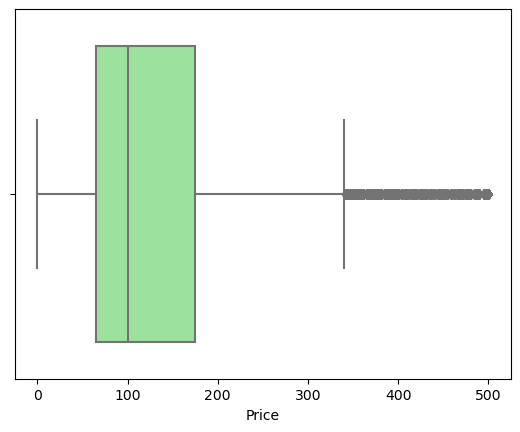

In [19]:

sns.boxplot(x = listings['price'], color='lightgreen')

plt.xlabel('Price')

plt.show()

In [21]:
q3 = listings["price"].quantile(0.75)
q1 = listings["price"].quantile(0.25)
iqr = q3 - q1 
upper_bound = q3 + (1.5 * iqr)   
lower_bound = q1 - (1.5 * iqr)   

listings=listings[(listings["price"] >= lower_bound) & (listings["price"] <= upper_bound)]

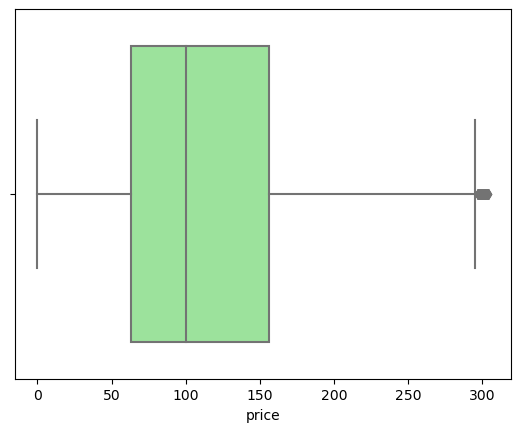

In [22]:
sns.boxplot(x = listings['price'], color='lightgreen')

plt.show()

So here outliers are removed, see the new max price

In [23]:
print(listings['price'].max())

304


In the following part i will explore the price ove the provided data through answering the qestions behind

To provide an overview of how prices are distributed.

1. What is the distribution of listing prices (price column) in the datafram?

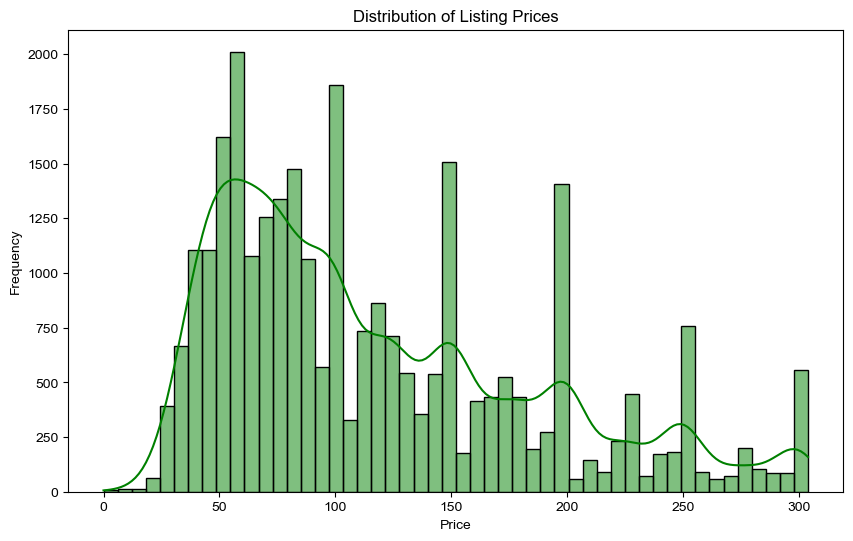

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(listings['price'], kde=True, color='green')
sns.set_theme(style='whitegrid')
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Conclusion:

The range of prices on Airbnb spans from 21 to 300 dollars, with the predominant concentration falling between 50 and 100 dollars. The distribution exhibits a peak in the 50 dollars range, indicating a higher density of listings. Conversely, there is a noticeable decline in listing density for prices exceeding 200 dollars, suggesting a potential scarcity of offerings in this higher price range. Overall, the majority of listings are clustered in the 50-100 range, and the distribution reveals a tapering trend towards higher price. 

- Investigate if the size of the property influences the pricing.
2. Is there a correlation between the number of bedrooms (bedrooms column) and the listing price?

In [25]:
listings["bedrooms"]

0        1
1        1
2        2
3        1
4        1
        ..
30174    4
30175    1
30176    1
30177    1
30178    1
Name: bedrooms, Length: 28479, dtype: int64

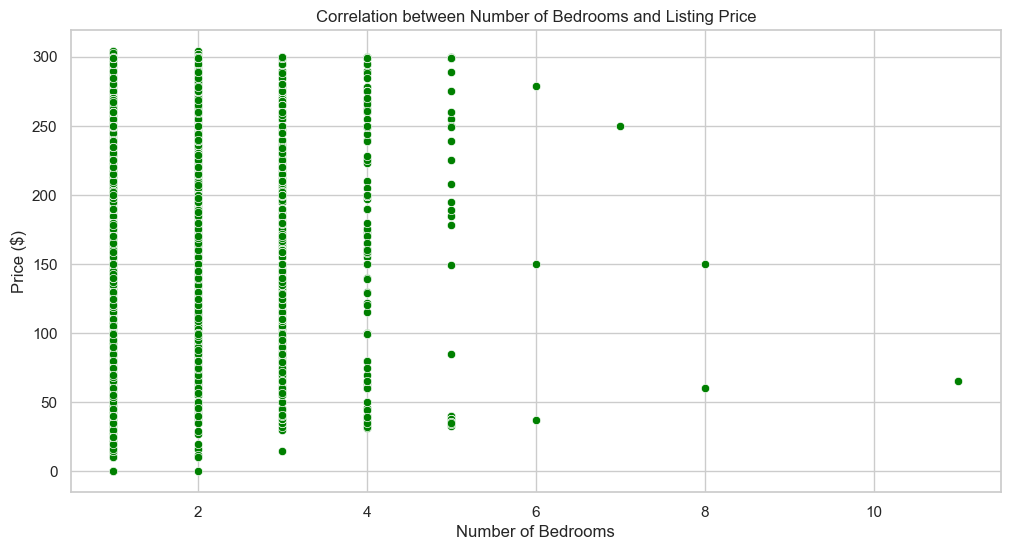

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='bedrooms', y='price', data=listings, color='green')
plt.title('Correlation between Number of Bedrooms and Listing Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($)')
plt.show()

Conclusion:
- The price dose not depend critically on the number of bedrooms.

- Understand how location impacts pricing.
3. What is the average price per night for each neighborhood (neighbourhood column)?

In [27]:
avg_price_per_neighborhood = listings.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
avg_price_per_neighborhood 

neighbourhood
Noho                    219.125000
Meatpacking District    208.250000
Flatiron District       192.229167
West Village            189.851190
Financial District      188.387755
                           ...    
Westerleigh              40.000000
New Brighton             40.000000
Grasmere                 33.333333
Van Nest                 32.500000
Concord                  31.250000
Name: price, Length: 187, dtype: float64

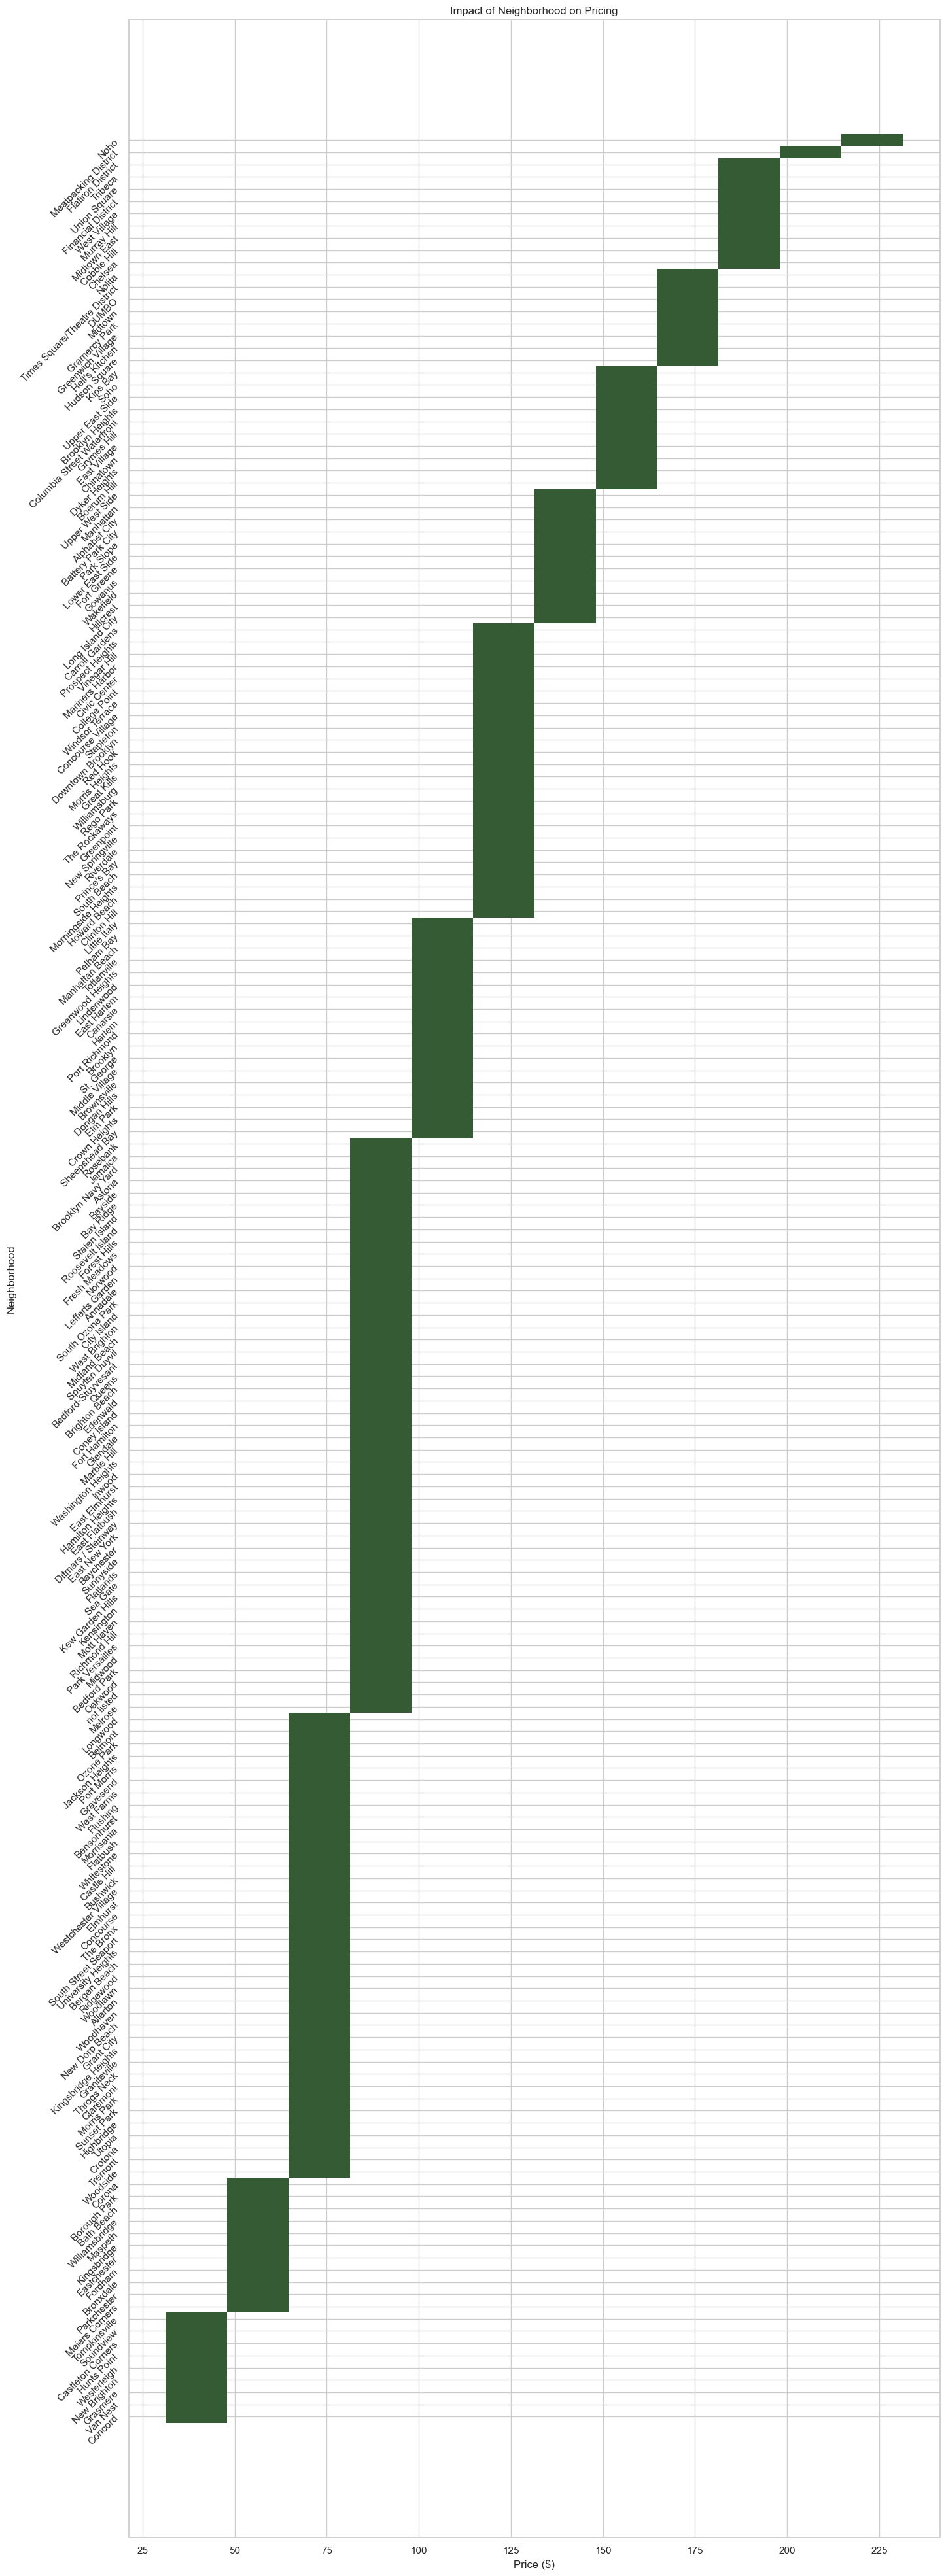

In [43]:
avg_price_df = pd.DataFrame({'Neighborhood': avg_price_per_neighborhood.index, 'Average_Price': avg_price_per_neighborhood.values})
plt.figure(figsize=(16, 50))
sns.histplot(y='Neighborhood', x='Average_Price', data=avg_price_df, color='green')
plt.title('Impact of Neighborhood on Pricing')
plt.ylabel('Neighborhood')
plt.xlabel('Price ($)')
plt.yticks(rotation=45)
plt.show()

In [48]:
counts = listings['neighbourhood'].value_counts()
Neighborhood_group = counts.reset_index()
Neighborhood_group.columns = ['Neighborhood', 'Listing']
Neighborhood_group

,Neighborhood,Listing
0,Brooklyn,6839
1,Manhattan,5556
2,Queens,1669
3,Williamsburg,1185
4,Bedford-Stuyvesant,1123
...,...,...
182,Graniteville,1
183,Prince's Bay,1
184,Grant City,1
185,Westerleigh,1


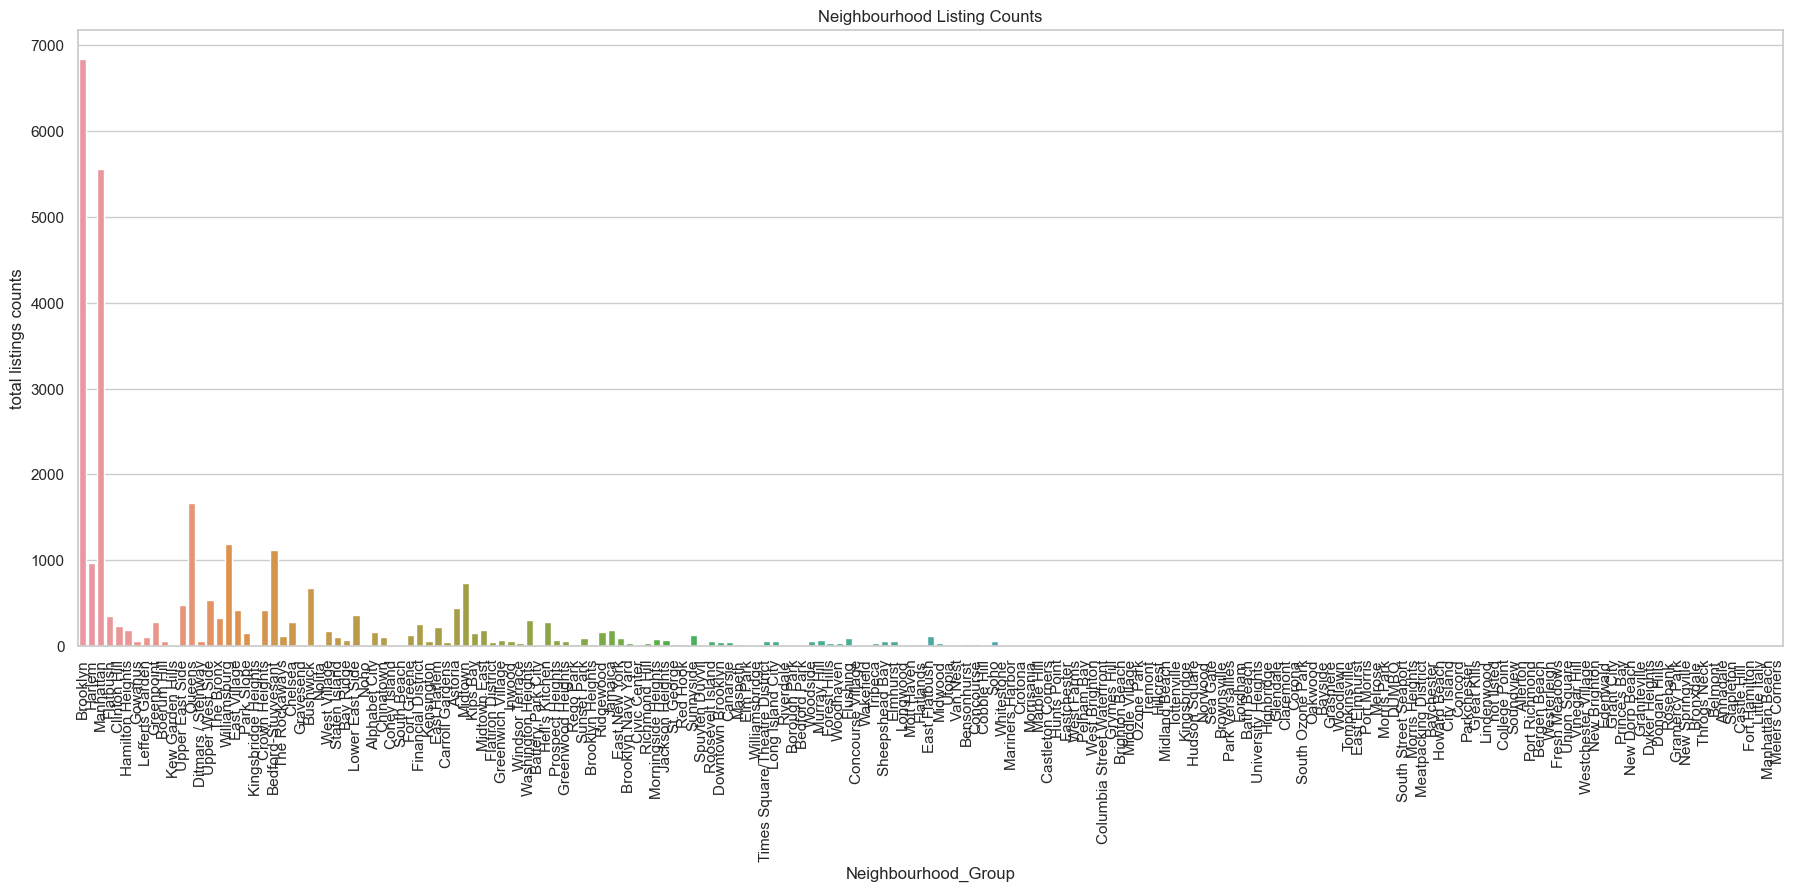

In [47]:
plt.figure(figsize=(22, 8))
sns.countplot(x='neighbourhood', data=listings)
plt.title('Neighbourhood Listing Counts')
plt.xlabel('Neighbourhood_Group')
plt.ylabel('total listings counts')
plt.xticks(rotation=90)
plt.show()

Conclusion:

A clear dependance of the neighbourhood on the price. I would say so far this is the stronest factor that affect the price dependacy. the most expensive neighbourhood is Noho and meat packing restric where concord and van nest are the cheapest neighbourhood.

In [49]:
grouped = listings.groupby("neighbourhood").mean()
neighbourhood_group_avg_price = grouped.reset_index()
neighbourhood_group_avg_price = round(neighbourhood_group_avg_price.rename(columns={"price": "avg_price"}),2)
neighbourhood_group_avg_price[['neighbourhood', 'avg_price']]

/var/folders/8_/q23ndpx52rq7gz827d_b1dhr0000gn/T/ipykernel_29672/74587744.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = listings.groupby("neighbourhood").mean()


,neighbourhood,avg_price
0,Allerton,73.33
1,Alphabet City,145.32
2,Annadale,91.50
3,Astoria,95.35
4,Bath Beach,64.00
...,...,...
182,Windsor Terrace,128.69
183,Woodhaven,72.57
184,Woodlawn,74.00
185,Woodside,66.58


- Explore if prices vary based on the time of year.
4. Are there seasonal patterns in pricing, considering the calendar_updated column?

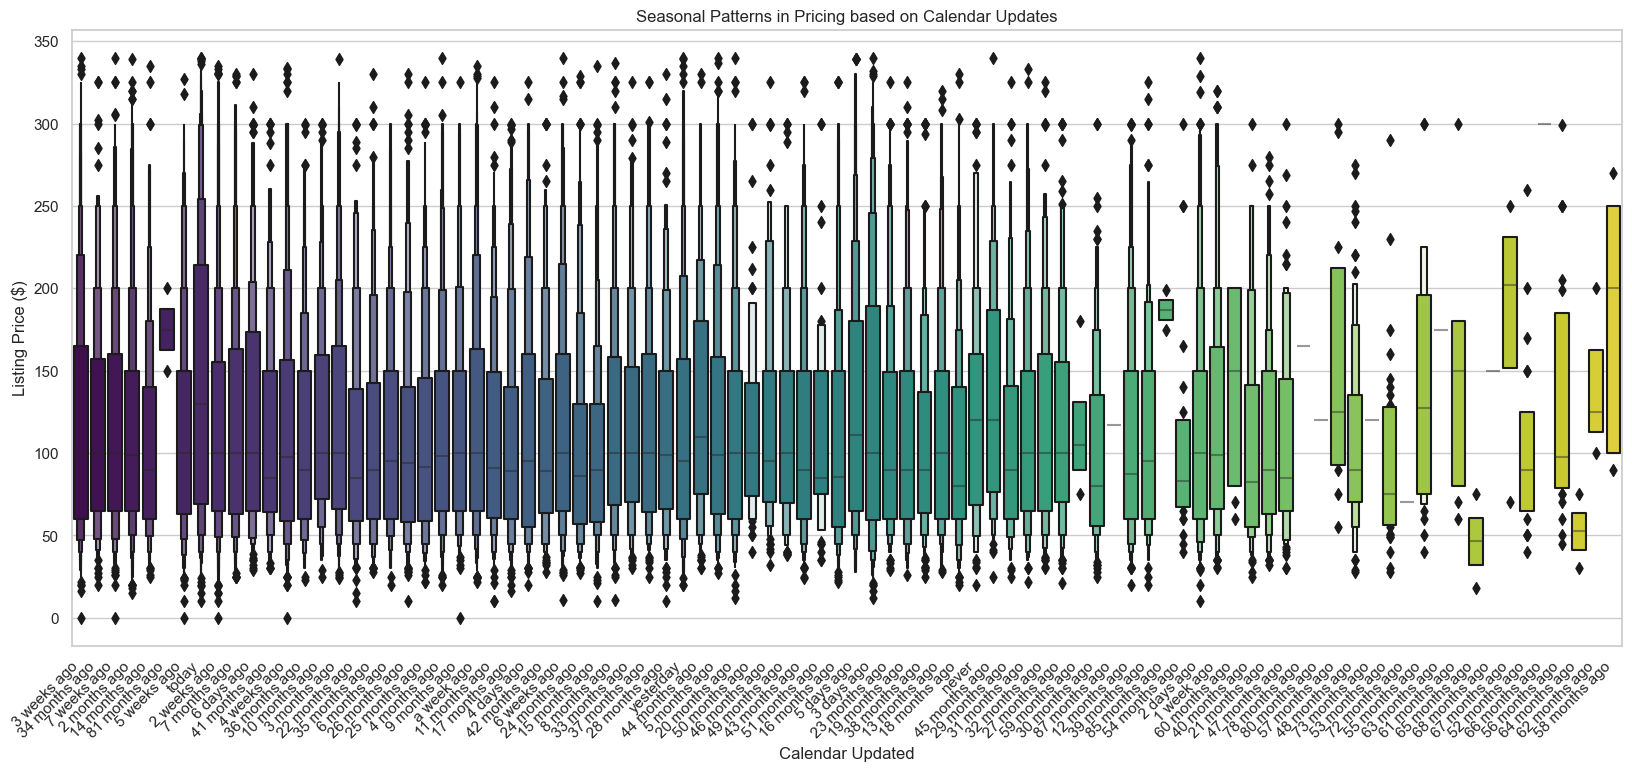

In [50]:
plt.figure(figsize=(20, 8))
sns.boxenplot(x='calendar_updated', y='price', data=listings)
plt.title('Seasonal Patterns in Pricing based on Calendar Updates')
plt.xlabel('Calendar Updated')
plt.ylabel('Listing Price ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

- Investigate if certain amenities contribute to higher listing prices.
5. Do listings with specific amenities (amenities column) command higher prices?

In [51]:
listings["amenities"].head()

0    {TV,"Cable TV",Internet,Wifi,"Wheelchair acces...
1    {"Cable TV",Internet,Wifi,"Air conditioning",K...
2    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
3    {Wifi,"Air conditioning","Free street parking"...
4    {Internet,Wifi,Kitchen,"Paid parking off premi...
Name: amenities, dtype: object

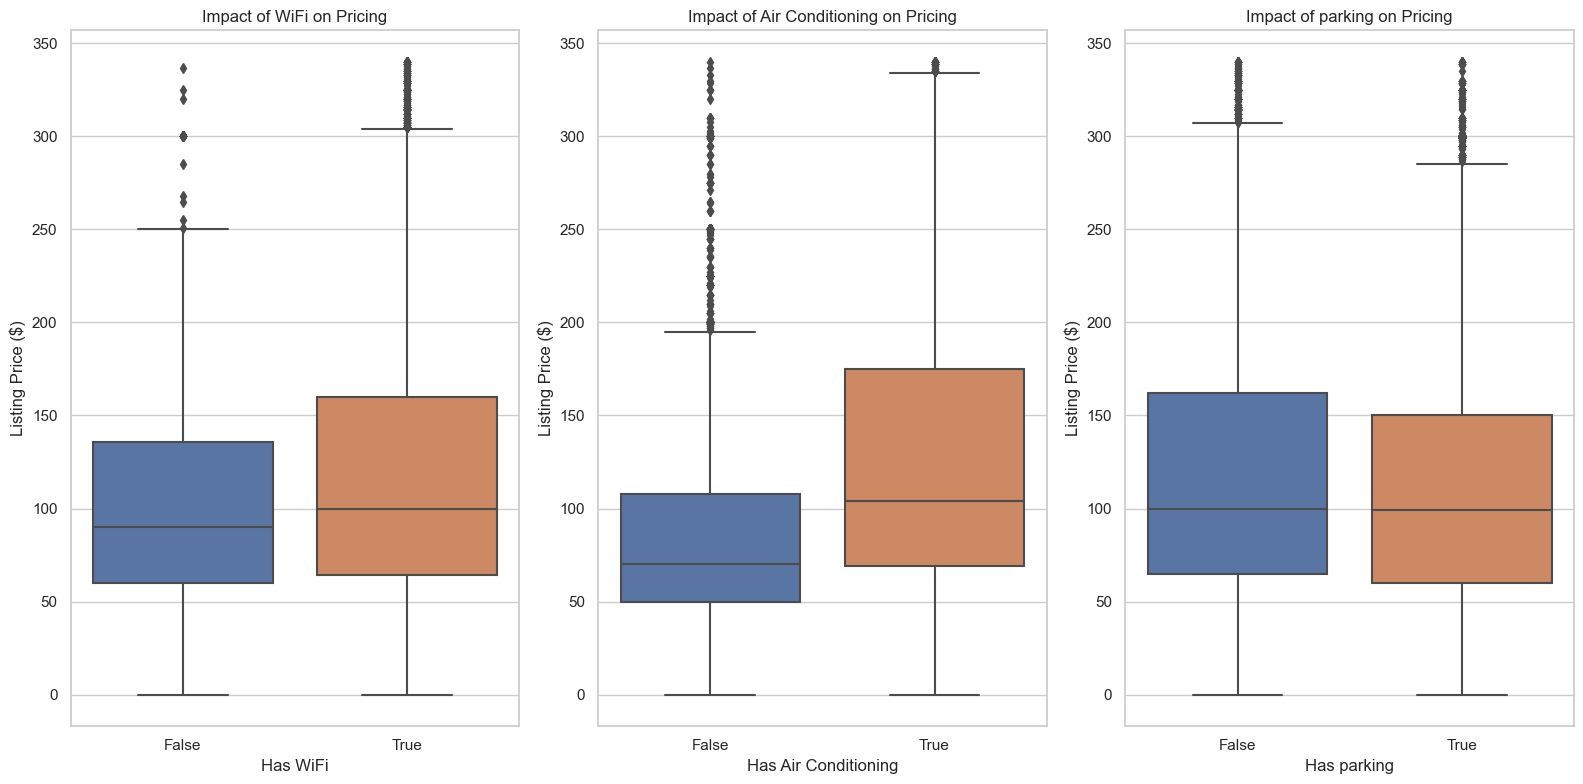

In [71]:
listings['has_wifi'] = listings['amenities'].str.contains('wifi' , case=False)
listings['has_air_conditioning'] = listings['amenities'].str.contains('air conditioning', case=False)
listings['has_parking'] = listings['amenities'].str.contains('parking', case=False)

plt.figure(figsize=(16, 8))
plt.subplot(1, 3, 1)
sns.boxplot(x='has_wifi', y='price', data=listings)
plt.title('Impact of WiFi on Pricing')
plt.xlabel('Has WiFi')
plt.ylabel('Listing Price ($)')

plt.subplot(1, 3, 2)
sns.boxplot(x='has_air_conditioning', y='price', data=listings)
plt.title('Impact of Air Conditioning on Pricing')
plt.xlabel('Has Air Conditioning')
plt.ylabel('Listing Price ($)')


plt.subplot(1, 3, 3)
sns.boxplot(x='has_parking', y='price', data=listings)
plt.title('Impact of parking on Pricing')
plt.xlabel('Has parking')
plt.ylabel('Listing Price ($)')


plt.tight_layout()
plt.show()

Conclusion:

It seems that some amenities has an effect on the price like the airconditioner and the wifi unlike the exsitting of parkings.

6. How do reviews and overall rating (review_scores_rating column) correlate with pricing?

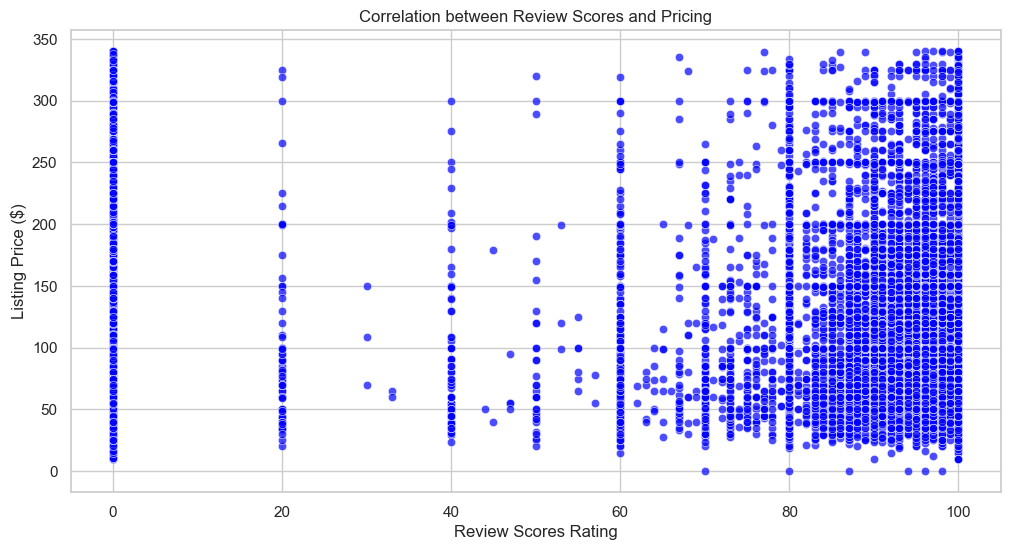

In [72]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='review_scores_rating', y='price', data=listings, alpha=0.7, color='blue')
plt.title('Correlation between Review Scores and Pricing')
plt.xlabel('Review Scores Rating')
plt.ylabel('Listing Price ($)')
plt.show()


Conclusion
There is no correlation between the review and the price. 

- Investigate if longer minimum stay requirements are associated with higher prices.
7. Is there a relationship between the minimum stay requirement (minimum_nights column) and the price?

In [52]:
listings["minimum_nights"]

0        1
1        3
2        7
3        1
4        4
        ..
30174    1
30175    2
30176    4
30177    1
30178    7
Name: minimum_nights, Length: 28761, dtype: int64

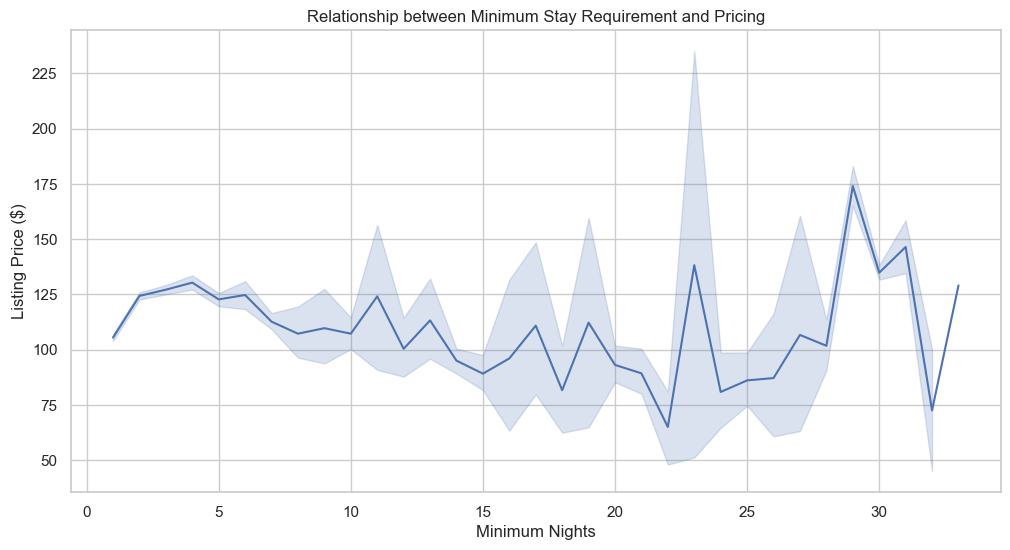

In [53]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='minimum_nights', y='price', data=listings)
plt.title('Relationship between Minimum Stay Requirement and Pricing')
plt.xlabel('Minimum Nights')
plt.ylabel('Listing Price ($)')
plt.show()

Conclusion :
- The figure shows no clear dependancy of the price on the minimum nuber of nights.

- Explore if faster response times are associated with higher prices.
8. What is the distribution of the host response time (host_response_time column) and its impact on pricing?

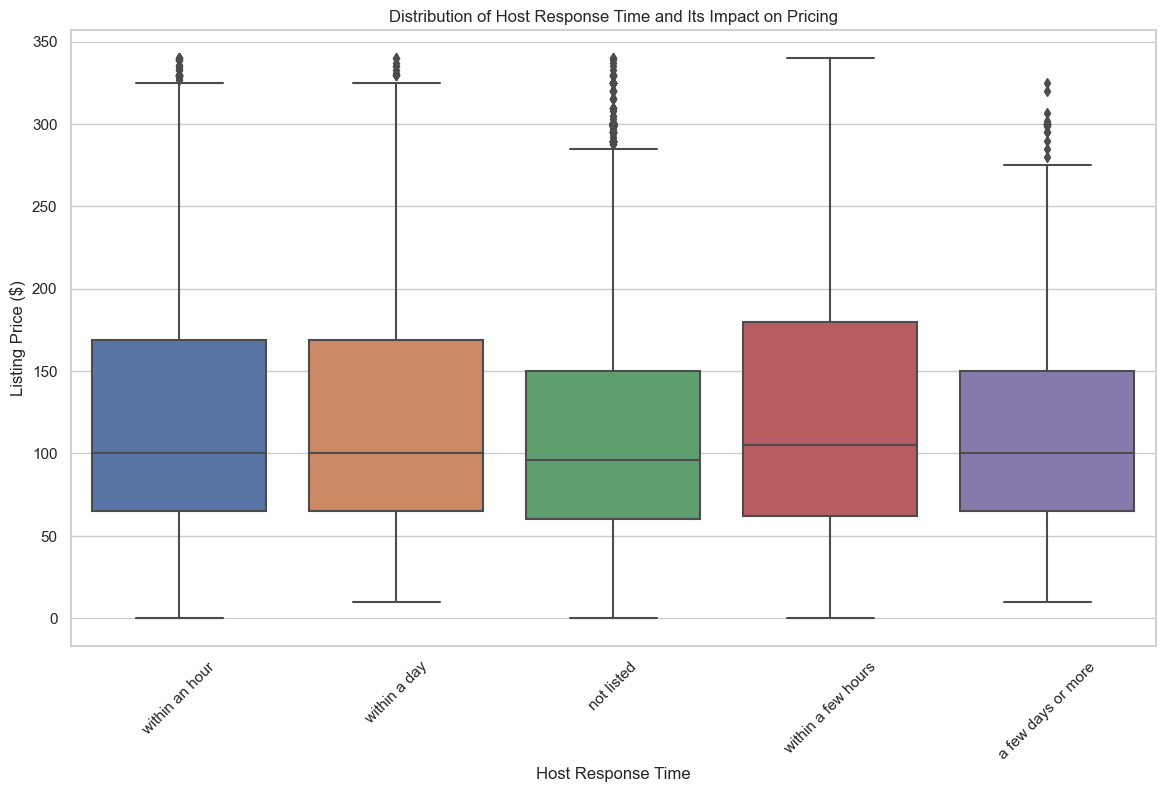

In [113]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='host_response_time', y='price', data=listings)
plt.title('Distribution of Host Response Time and Its Impact on Pricing')
plt.xlabel('Host Response Time')
plt.ylabel('Listing Price ($)')
plt.xticks(rotation=45)  
plt.show()

Conclusion

There is no strong dependancy betweeb the reponce time and the price of the listenings.


- Explore if listings with instant booking options have different pricing dynamics.
9. How does the availability of instant booking (instant_bookable column) impact pricing?

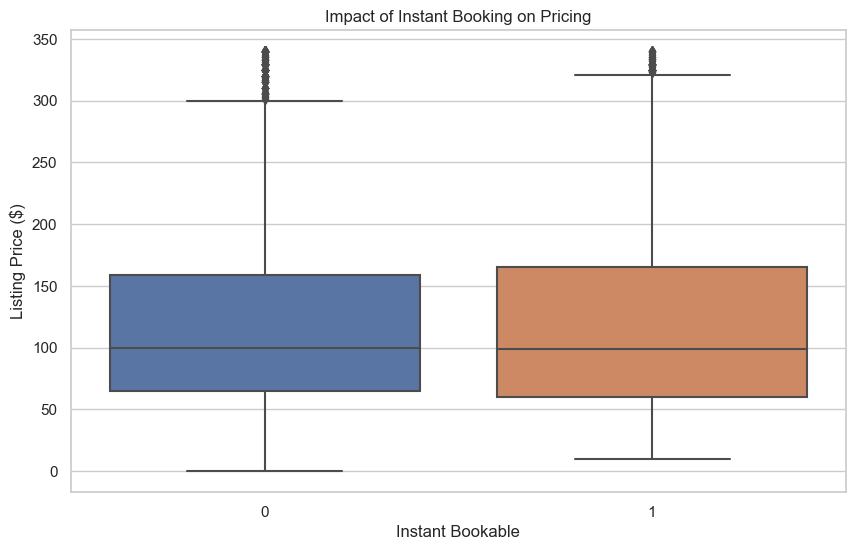

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='instant_bookable', y='price', data=listings)
plt.title('Impact of Instant Booking on Pricing')
plt.xlabel('Instant Bookable')
plt.ylabel('Listing Price ($)')
plt.show()

Conclusion 

The instance booking doesnot affect the price of the listings.

- Investigate if more flexible or stricter cancellation policies are associated with different prices.
10. Is there a correlation between the cancellation policy (cancellation_policy column) and pricing?

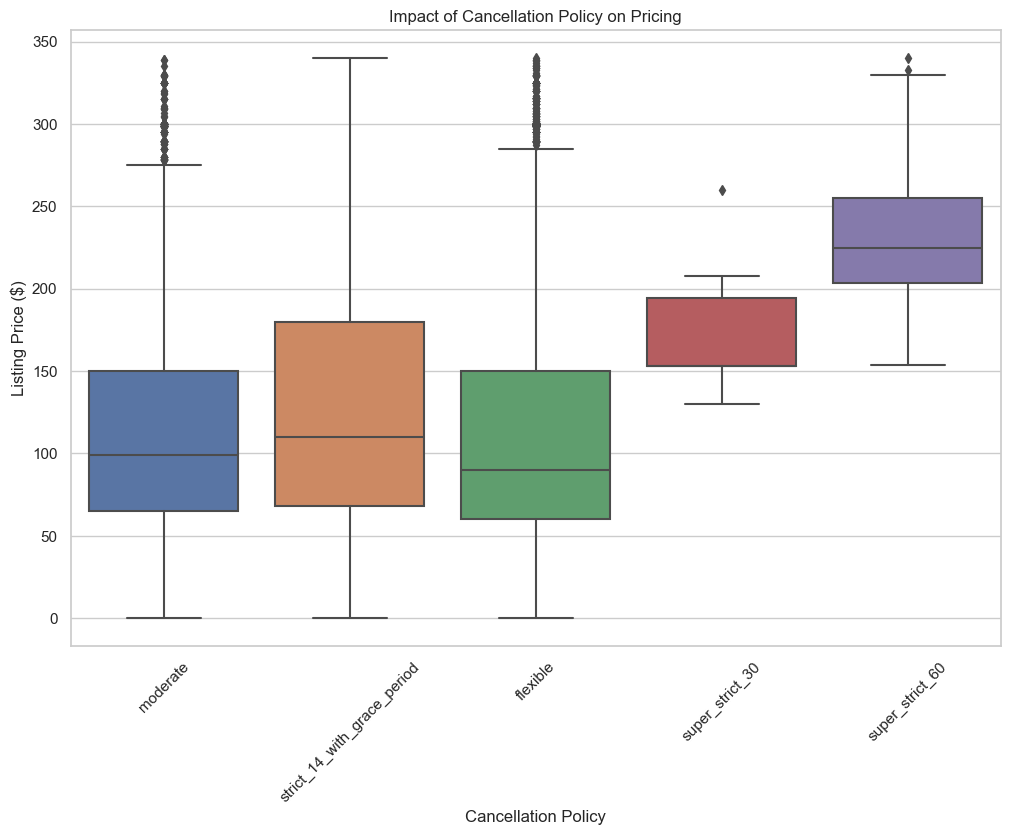

In [136]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='cancellation_policy', y='price', data=listings)
plt.title('Impact of Cancellation Policy on Pricing')
plt.xlabel('Cancellation Policy')
plt.ylabel('Listing Price ($)')
plt.xticks(rotation=45)  
plt.show()

Conclusion:

It is shown in the figure above that the cancellation policy is affecting the listing price.The least listing price goes for the moderate and the flexible cancellation policy, however the highest listing price goes for the super strict  30 and super strict 60 , and the middle listing price comes the strict 14 with grace period. The listing pricing range is wide for the strict 14 with grsce period cancellation policy unlike the case for the super strict 30 cancellation policy has the least range of prices.

- Explore how the type of accommodation impacts pricing.
11. Are there any significant differences in pricing between different room types (room_type column)?

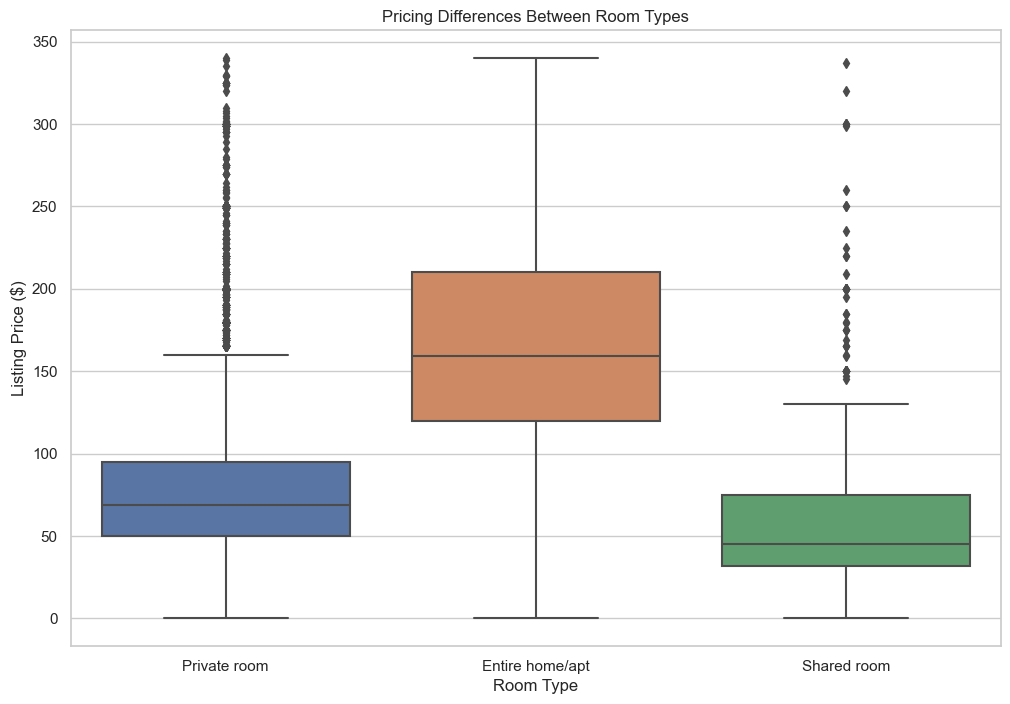

In [55]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='room_type', y='price', data=listings)
plt.title('Pricing Differences Between Room Types')
plt.xlabel('Room Type')
plt.ylabel('Listing Price ($)')
plt.show()

Conclusion

The figure shows that the entire home is having the highest pricing listings unlike the shared room that has the least pricing range while the private room has the middle range of pricing. SO that it might be interesting to know how many listings in each room type and visualize it.

In [56]:
room_type = listings['room_type'].value_counts().reset_index()
room_type.columns = ['Room_Type', 'Listing_count']
room_type

,Room_Type,Listing_count
0,Private room,14953
1,Entire home/apt,12981
2,Shared room,827


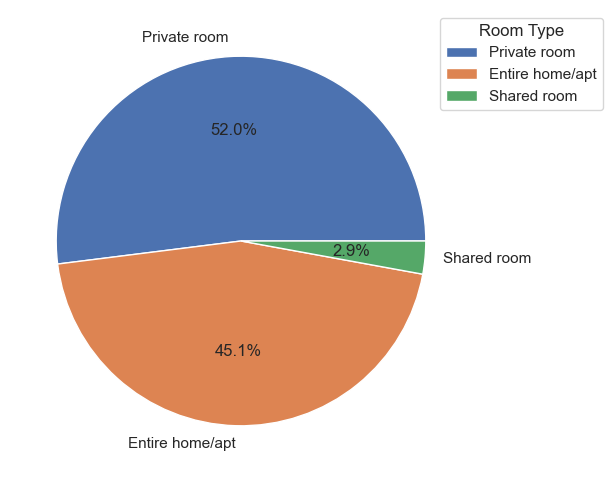

In [57]:

plt.figure(figsize=(10, 6))
room_type_counts = listings['room_type'].value_counts()
labels = room_type_counts.index
sizes = room_type_counts.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.legend(title='Room Type', bbox_to_anchor=(0.8, 0, 0.5, 1))
plt.show()

- Drill down into more specific details, exploring the intersection of property types and neighborhood influences on pricing.
12. What is the average price for each property type in different neighborhoods (property_type and neighbourhood columns)?

In [58]:
average_prices = listings.groupby(['property_type', 'neighbourhood'])['price'].mean().reset_index()
average_prices


,property_type,neighbourhood,price
0,Aparthotel,Bedford-Stuyvesant,75.000000
1,Aparthotel,Manhattan,224.666667
2,Aparthotel,Midtown,293.200000
3,Aparthotel,Midtown East,300.000000
4,Apartment,Allerton,70.000000
...,...,...,...
727,Villa,Manhattan,200.000000
728,Villa,Pelham Bay,299.000000
729,Villa,Queens,48.500000
730,Yurt,Upper East Side,188.000000


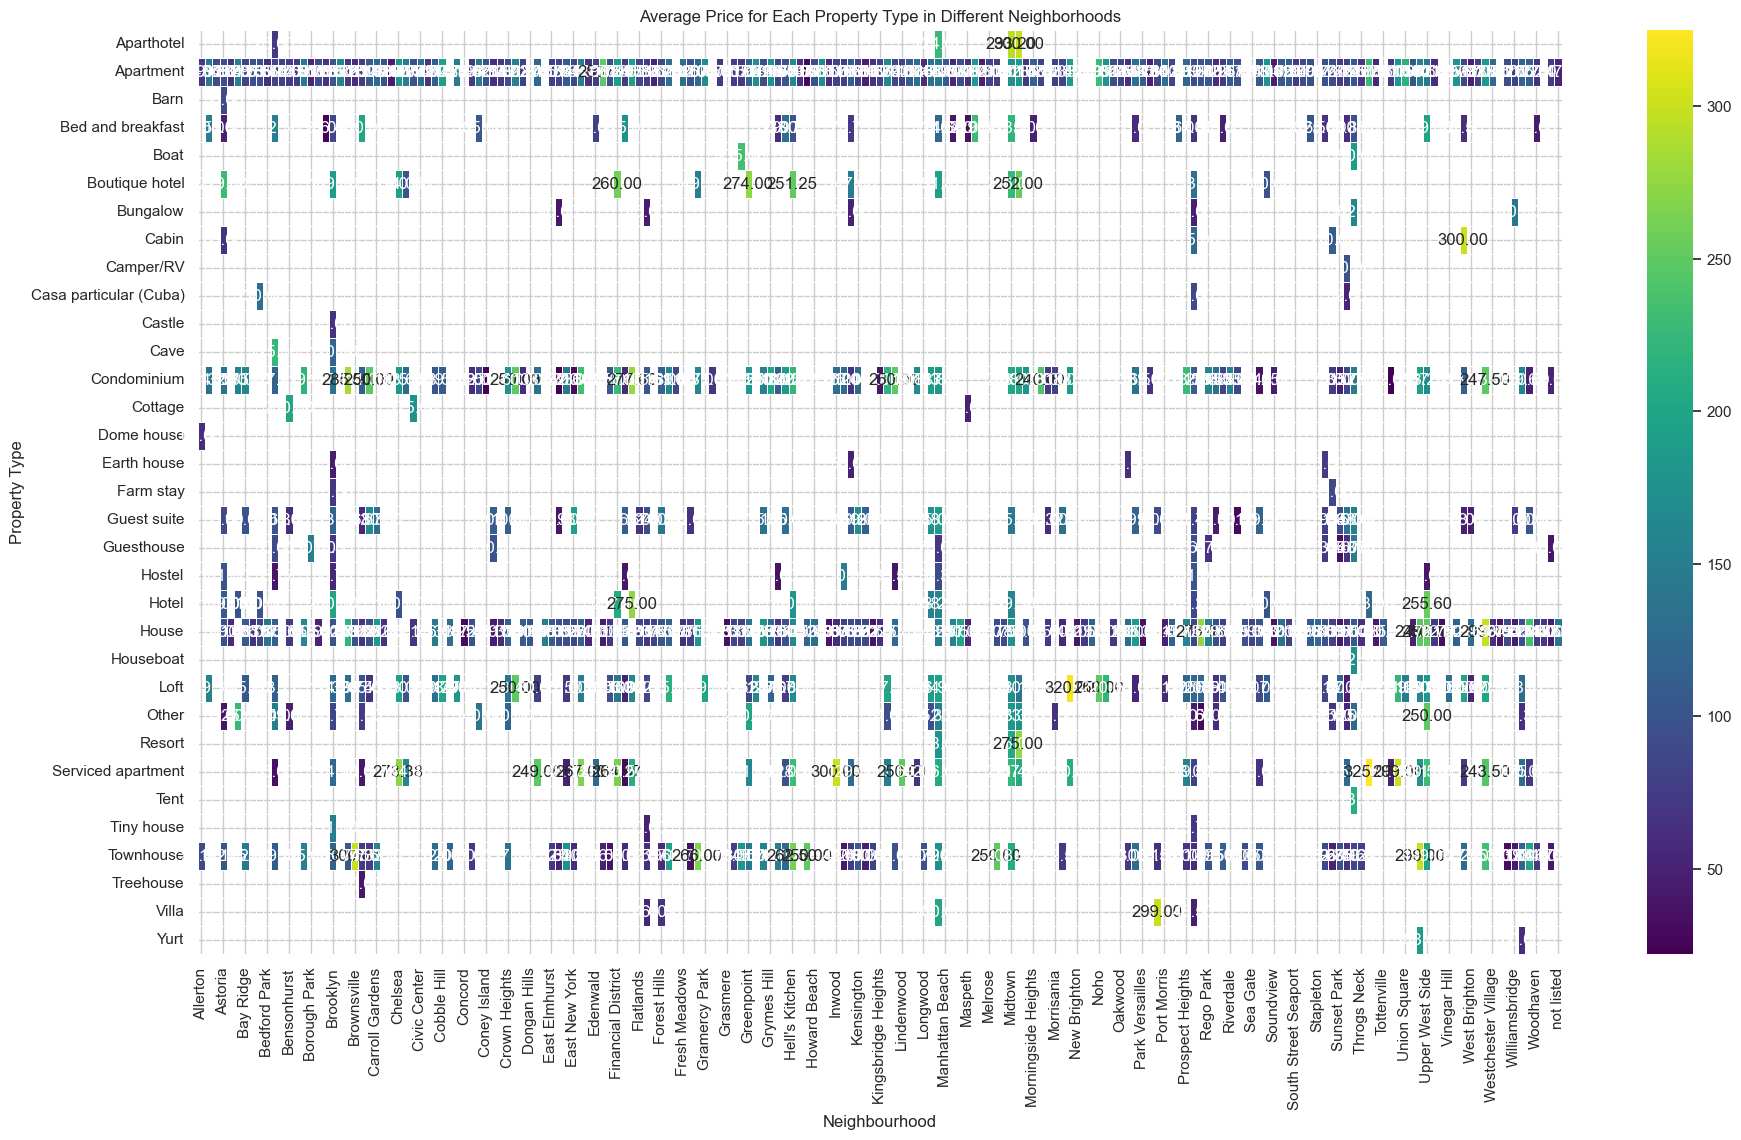

In [172]:

# # Create a bar plot with hue for property_type
# plt.figure(figsize=(16, 8))
# sns.histplot(x='neighbourhood', y='property_type', hue='price', data=average_prices, palette='viridis')
# plt.title('Average Price for Each Property Type in Different Neighborhoods')
# plt.xlabel('Neighbourhood')
# plt.ylabel('Property type')
# plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()


plt.figure(figsize=(22, 12))
heatmap_data = average_prices.pivot(index='property_type', columns='neighbourhood', values='price')
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price for Each Property Type in Different Neighborhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Property Type')
plt.show()

Conclusion:

The figure shows a map of the property types in all the neighbourhood provided in the data and their pricing are marked in color range.

- Explore if certain property types tend to have higher or lower prices.

13. How does the distribution of prices vary across different property types (property_type column)?

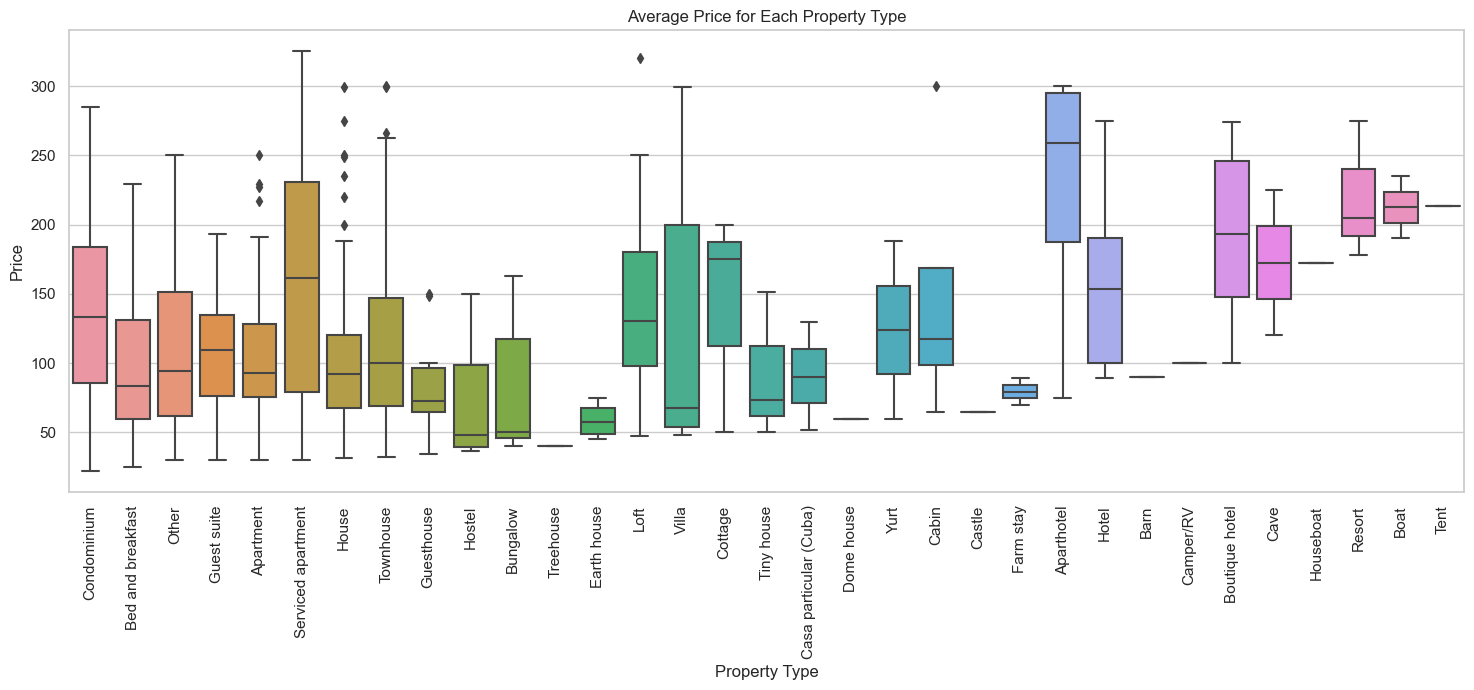

In [59]:
average_prices_sorted = average_prices.sort_values(by='price')
plt.figure(figsize=(18, 6))
sns.boxplot(x='property_type', y='price', data=average_prices_sorted)
plt.title('Average Price for Each Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()


Conclusion:
The price depends on the type of property. where i can see the maximum price is for the Aparthotel. I will classify the property type to three categories (expensive, affordable, cheap) based on their price. I can see that the expensive property type lies between Botique hotel,serviced apartment, Aparthotel, cave, house boat, resort, boat, tent. the affordable property type is a mong Apartment, condominium, House, Townhouse, Loft, Bed and breakfast, Cabin, Other, Guest suite, Vila, Guesthouse, Tiny house, Cottage, Casa particular(Cuba), Campr/RV, Yurt. the cheap property type lies between Treehouse, Earth house, Hostel, CastleDome house, Farm stay, and Barn.

- Explore if listings with creative, themed, or unique property descriptions tend to have higher prices.
14. Does the presence of unique or themed descriptions (summary and description columns) impact pricing?

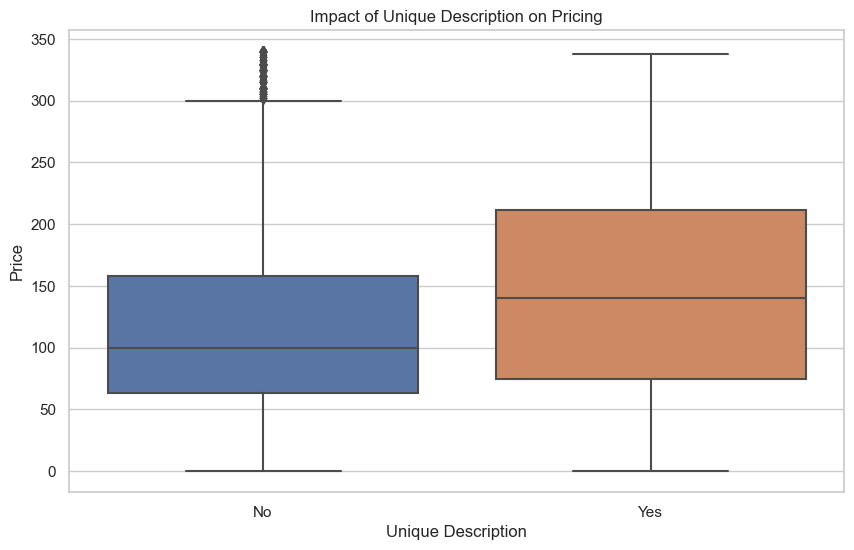

In [61]:
listings['unique_description'] = listings['description'].apply(lambda x: 1 if 'unique' in str(x).lower() else 0)

plt.figure(figsize=(10, 6))
sns.boxplot(x='unique_description', y='price', data=listings)
plt.title('Impact of Unique Description on Pricing')
plt.xlabel('Unique Description')
plt.ylabel('Price')
plt.xticks([0, 1], ['No', 'Yes'])  
plt.show()

Conclusion

The unique description impact the price of the listings appearently.

- Investigate if listings closer to popular landmarks or attractions in a city tend to have higher prices.
15. Are there any correlations between the proximity of popular landmarks or attractions (neighborhood_overview column) and pricing?

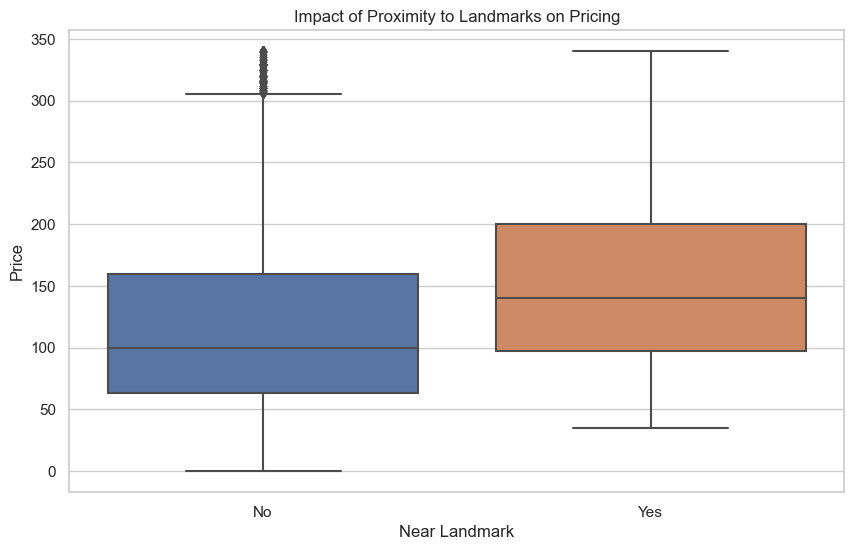

In [77]:

listings['near_landmark'] = listings['neighborhood_overview'].str.contains('landmark', case=False, na=False).astype(int)
plt.figure(figsize=(10, 6))
sns.boxplot(x='near_landmark', y='price', data=listings)
plt.title('Impact of Proximity to Landmarks on Pricing')
plt.xlabel('Near Landmark')
plt.ylabel('Price')
plt.xticks([0, 1], ['No', 'Yes'])  
plt.show()

Coclusion

The price of the listings that are near to the landmark is higher than the listings that lies far from landmarks.

Conclusion:

In this report I have explored the listing pricing along the whole provided data by answering a proposed questions through the data columns and I can coclude  key insights. The price distribution spans from $21 to $300, with a concentration between $50 and $100. While the number of bedrooms shows no critical impact on pricing, neighborhood emerges as a significant determinant, with Noho and Meatpacking District being the most expensive. Certain amenities, such as air conditioning and Wi-Fi, influence pricing, while the presence of parking does not show a clear correlation. Reviews, minimum nights, and host response time exhibit no strong dependence on pricing. The cancellation policy, however, affects prices, with moderate and flexible policies linked to lower prices, and stricter policies associated with higher prices. Entire homes command the highest prices, and unique property descriptions impact pricing positively. Listings near landmarks tend to have higher prices, underlining the importance of location in pricing decisions. These insights collectively provide valuable guidance for both hosts and guests navigating the Airbnb marketplace.
In summary, while factors such as neighborhood, amenities, and property type play crucial roles in determining pricing, the number of bedrooms, minimum nights, and host response time show weaker associations with listing prices on Airbnb. These insights can guide both hosts and guests in understanding the factors influencing pricing decisions.
